<a href="https://colab.research.google.com/github/Manireddy69/GATE/blob/main/ML_from_scratch_for_GATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = np.array([1,2,3,4]).reshape(-1,1)
y = np.array([4,3,2,1])
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x,y)
# y_prediction = model.predict(x)
# mse = mean_squared_error(y,y_prediction)
# mse
model.coef_

array([-1.])

In [ ]:
x1 = np.array([-3.5,2.1,-4.3,1.7,0.1]).reshape(-1,1)
x2 = np.array([1.9, -3.3,5.1,2.2,-0.1]).reshape(-1,1)
y = np.array([0.21,0.01,0.97,0.98,0.45]).reshape(-1,1)
X = np.hstack([x1,x2])
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept= False)
model.fit(X,y)
print(model.coef_)

[[0.12844232 0.25365734]]


In [ ]:
y_pred = model.predict(X)
from sklearn.metrics import mean_squared_error
MSE_in =  mean_squared_error(y, y_pred)
print("MSE in inbuilt function:", MSE_in)

#manuel way
MSE = np.sum((y- y_pred)**2) / len(x)
print("MSE in manual way:", MSE)

MSE in inbuilt function: 0.13450476723079818
MSE in manual way: 0.16813095903849773


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept= False)
model.fit(X,y)
print(model.coef_)

[[0.12844232 0.25365734]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array([10,9,2,15,10,16,11,16]).reshape(-1,1)
y = np.array([95,80,10,45,45,98,38,93])
model= LinearRegression(fit_intercept= True)
model.fit(x,y)
X_new = np.array([[20]])
model.predict(X_new)

array([102.59280458])

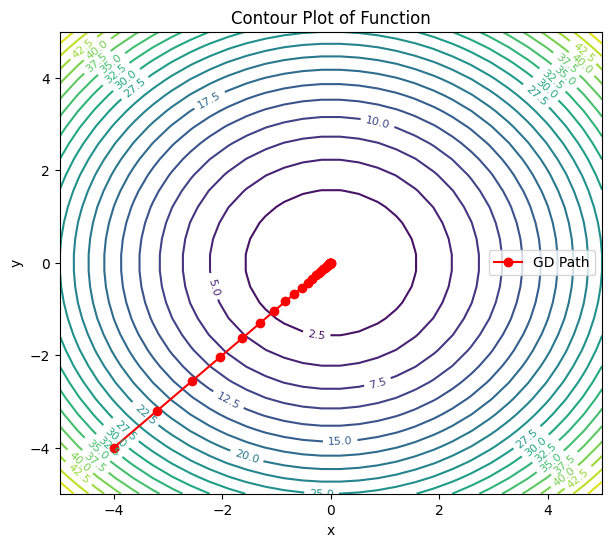

In [3]:
#contour map
import numpy as np
import matplotlib.pyplot as plt

def plot_contour(func, x_range=(-5, 5), y_range=(-5, 5),
                 steps=30, start=(-4, -4), lr=0.1, n_iter=20, show_path=True):
    """
    Plots contour map of a function of two variables with optional gradient descent path.

    Parameters:
    -----------
    func : callable
        Function with signature f(x, y).
    x_range : tuple
        Range of x values (min, max).
    y_range : tuple
        Range of y values (min, max).
    steps : int
        Number of grid steps for plotting.
    start : tuple
        Starting point for gradient descent.
    lr : float
        Learning rate for gradient descent.
    n_iter : int
        Number of gradient descent iterations.
    show_path : bool
        If True, plots the gradient descent path.
    """

    # Create grid
    x = np.linspace(x_range[0], x_range[1], steps)
    y = np.linspace(y_range[0], y_range[1], steps)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    # Plot contour
    plt.figure(figsize=(7, 6))
    cp = plt.contour(X, Y, Z, levels=20, cmap='viridis')
    plt.clabel(cp, inline=True, fontsize=8)
    plt.title("Contour Plot of Function")
    plt.xlabel("x")
    plt.ylabel("y")

    if show_path:
        # Gradient descent
        point = np.array(start, dtype=float)
        path = [point.copy()]

        for _ in range(n_iter):
            # Numerical gradient
            eps = 1e-5
            grad_x = (func(point[0] + eps, point[1]) - func(point[0] - eps, point[1])) / (2 * eps)
            grad_y = (func(point[0], point[1] + eps) - func(point[0], point[1] - eps)) / (2 * eps)
            grad = np.array([grad_x, grad_y])

            # Update
            point -= lr * grad
            path.append(point.copy())

        path = np.array(path)
        plt.plot(path[:,0], path[:,1], 'ro-', label="GD Path")
        plt.legend()

    plt.show()


# Example usage:
if __name__ == "__main__":
    # Example function: f(x,y) = x^2 + y^2
    f = lambda x, y: x**2 + y**2
    plot_contour(f, x_range=(-5,5), y_range=(-5,5), start=(-4,-4), lr=0.1, n_iter=30)
